In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cl = pd.read_csv("car data.csv")
cl

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X,y)

In [ ]:
sgd_reg.intercept_,sgd_reg.coef_

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Polynomial regression

In [ ]:
m=100
X=6*np.random.rand(m,1)-3
y= 0.5*X**2+X+2+np.random.randn(m,1)

In [ ]:
plt.scatter(X,y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

In [ ]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
poly = PolynomialFeatures(degree=2, include_bias=True) #include_bias=False remove the value of X^0
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [ ]:
print(X_train[0]) # value of X
print(X_train_trans[0]) # value of X^0, X^1, X^2 (from degree=2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

In [ ]:
y_pred = lr.predict(X_test_trans)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
# our actual equation is y= 0.5*X**2+X+2 => y=0.5X^2+X+2 coef=1 and 0.5  intercept=2
print(lr.coef_)
print(lr.intercept_)

In [ ]:
plt.plot(X_train_trans, lr.predict(X_train_trans), color='r')
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Performing ridge regression

In [15]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X,y)

Ridge(alpha=0.1, solver='cholesky')

In [16]:
ri = ridge_reg.predict(X)
ri[0]

array([10.1591095])

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
ri1=sgd_reg.predict(X)
ri1[0]

10.370150894495806

# performing lasso regression

C:\Users\dell\AppData\Local\Temp/ipykernel_7660/661540115.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(X_train,y_train)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.714012888937674, tolerance: 0.03495886926073816
  model = cd_fast.enet_coordinate_descent(


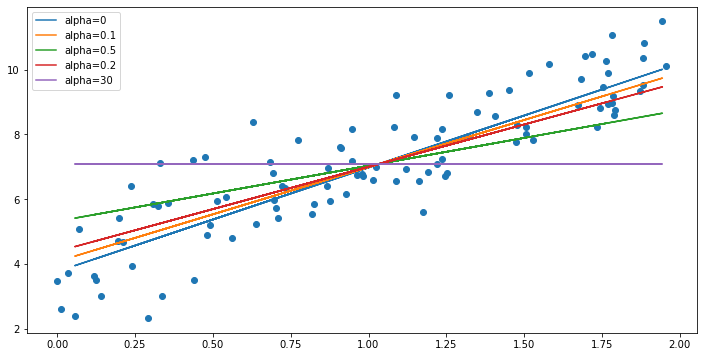

In [24]:
# our actual equation is y= 0.5*X**2+X+2 => y=0.5X^2+X+2 coef=1 and 0.5  intercept=2
from sklearn.linear_model import Lasso
alphas = [0,0.1,0.5,0.2,30] #performing on multiple values of alphas
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    lasso_reg = Lasso(alpha = i)
    lasso_reg.fit(X_train,y_train)
    plt.plot(X_test, lasso_reg.predict(X_test), label='alpha={}'.format(i))
plt.legend()
plt.show()


C:\Users\dell\AppData\Local\Temp/ipykernel_7660/1484074477.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic_reg.fit(X_train,y_train)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.714012888937674, tolerance: 0.03495886926073816
  model = cd_fast.enet_coordinate_descent(


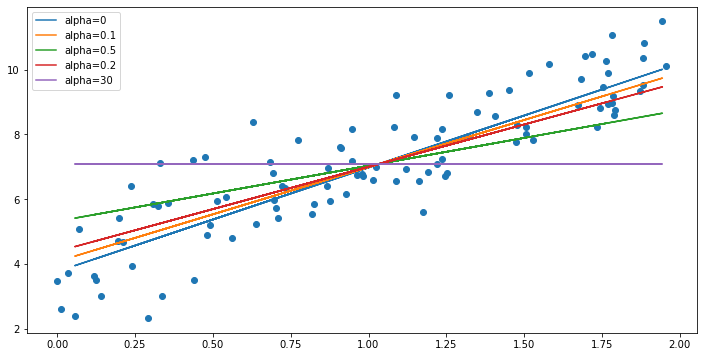

In [28]:
from sklearn.linear_model import ElasticNet
alphas = [0,0.1,0.5,0.2,30] #performing on multiple values of alphas
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    elastic_reg = ElasticNet(alpha = i, l1_ratio=0.5) #if li_ratio=0 elasticnet will be ridge and r=1 will be lasso regression
    elastic_reg.fit(X_train,y_train)
    plt.plot(X_test, elastic_reg.predict(X_test), label='alpha={}'.format(i))
plt.legend()
plt.show()